# Lab 03:  Model Selection for Boston housing data

In this lab, you will apply polynomial regression with model order selection to the Boston housing dataset. 

Before doing this lab, you should review the ideas in the [polynomial model selection demo](./polyfit.ipynb).  In addition to the concepts in that demo, you will learn to:
* Load data
* Fit a polynomial model for a given model order 
* Select the model order via K-fold cross-validation and the one-standard-error rule.
  

## Loading the data

We first load the standard packages.

In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We now load the Boston housing dataset, which happens to be pre-loaded into sklearn.

In [31]:
from sklearn.datasets import load_boston
boston = load_boston()

Let's see what the dataset contains.

In [32]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


The structure `boston` is made up of
* `data`: which contains the information for various houses
* `target`: which contains their prices
* `feature_names`: which contains the names of the features, and
* `DESCR`: which describes the dataset
* `filename`: which shows where the file is stored on your local machine

Let's print the description.

In [33]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's turn this dataset into a `pandas` dataframe for ease of handling.

In [34]:
import pandas as pd
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['MEDV'] = boston.target
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


Now, create the target vector `y` using the values in the column `MEDV` using the `numpy.array` command. 
Similarly, create the feature vector `x` using the values in the `LSTAT` column.

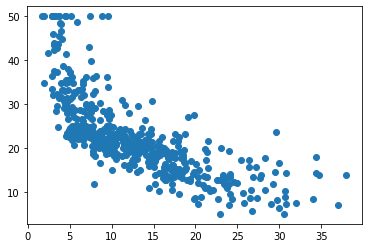

In [35]:
# TODO
# y = ...
# X = ...
y = np.array(df['MEDV'])
x = np.array(df['LSTAT'])
plt.scatter(x, y)

# Fitting Models with Different Orders
We will now fit the polynomial model to the data using order d = 1 and order d = 15, for illustration.

For this, we'll use the `polyfit` command of the `numpy.polynomial.polynomial` library.

Text(0, 0.5, 'Median value of owner-occupied homes in $1000s')

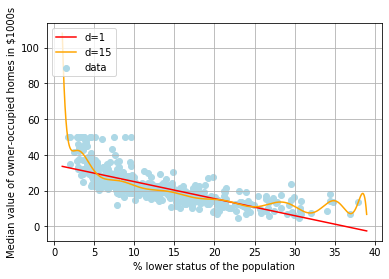

In [55]:
# TODO 
# Import polynomial library
import numpy.polynomial.polynomial as poly
# d1 = 1,d2 = 15
d1 = 1
d2 =15
# beta1 = 
beta1 = poly.polyfit(x,y,d1)
# beta2 =
beta2 = poly.polyfit(x,y,d2)
# xp = # grid of feature values
xp = np.linspace(1, 39, 1000)
# yp_hat1 = # target prediction on grid using polynomial order d1
yp_hat1 = poly.polyval(xp, beta1)
# yp_hat1 = # target prediction on grid using polynomial order d2
yp_hat2 = poly.polyval(xp, beta2)
# Make a scatterplot and superimpose prediction curves for d1 and d2
plt.plot(xp,yp_hat1, color = 'red')
plt.plot(xp,yp_hat2, color = 'orange')
plt.scatter(x, y, color = 'lightblue')
# Add grid lines, axis labels, and a legend
plt.legend(['d=1', 'd=15', 'data'], loc='upper left')
plt.grid()
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')

How do these two model orders perform?  Are the results as expected? Can we do better?

## K-fold Cross-Validation

We now optimize the polynomial model order using 5-fold cross-validation.  You can follow the method used in the polynomial demo.  The first step is to create a matrix of test RSS values over all hypothesized model orders and all splits.

In [43]:
import sklearn.model_selection

# TODO
# Create a k-fold object
k = 5
kfo = sklearn.model_selection.KFold(n_splits=k,shuffle=True)
# Model orders to be tested
dtest = np.arange(0,10)
nd = len(dtest)

RSSts = np.zeros((nd,k))
# Loop over the folds
    # Get the training data in the split
    # Loop over the model order
        # Fit data on training data
        # Measure RSS on test data
        # RSSts[it,itsplit] = 
for itsplit, Ind in enumerate(kfo.split(x)): # enumerate returns a counter (isplit) and a list (Ind)
        
    # Get the training data in the split
    Itr, Its = Ind 
    #kfo.split( ) produced Ind, which contains a pair of index sets for each fold 
    xtr = x[Itr]
    ytr = y[Itr]
    xts = x[Its]
    yts = y[Its]
    
    # Loop over the model order
    for it, d in enumerate(dtest):
    
        # Fit data on training data
        beta_hat = poly.polyfit(xtr,ytr,d)
        
        # Measure RSS on test data
        yhat = poly.polyval(xts,beta_hat)
        RSSts[it,itsplit] = np.mean((yhat-yts)**2)
print(RSSts)


[[87.81171301 60.09370248 99.01128841 94.16819304 83.22526676]
 [40.99684491 23.17790129 48.5724941  49.90601197 31.33834362]
 [28.71582081 19.34948829 35.70413477 42.05054017 27.64531406]
 [26.84146878 18.17723475 36.43305564 39.4323649  26.87343867]
 [26.02675003 16.93790792 34.46093798 37.00496478 26.50545038]
 [25.78312105 16.44590492 35.12808473 36.35039737 24.95256191]
 [27.78355768 16.21926229 34.44422088 36.29967669 24.76715114]
 [31.69983698 16.60886313 34.25920009 36.35290649 24.81727006]
 [35.72049991 16.68653056 35.93772113 36.18391319 26.23111762]
 [33.89149552 16.35692371 33.98100016 35.79878775 25.63305083]]


Next, compute the mean and standard error of the RSS over the folds for each model order.  The standard error is defined as the standard deviation *$\sqrt{1/(K-1)}$, where $K$ is the number of folds.  We use $K-1$ to get an unbiased SE estimate.

With these RSS statistics, use the one-standard-error rule to find the best model order.  Print out the model order that minimizes mean test RSS, as well as the model order estimated by the one-standard-error rule.

[84.86203274 38.79831918 30.69305962 29.55151255 28.18720222 27.732014
 27.90277374 28.74761535 30.15195648 29.13225159]


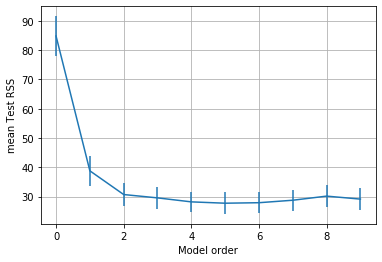

In [47]:
# TODO
# compute mean and standard error of RSS
# find model order that minimizes test RSS
# print("The model order that minimizes mean test RSS is ...")
# estimate model order according to the one-standard-error rule
# print("The model order estimated by the one-standard-error rule is ...")
RSS_mean = np.mean(RSSts,axis=1) 
print(RSS_mean)
RSS_se  = np.std(RSSts,axis=1)/np.sqrt(k-1)
plt.errorbar(dtest, RSS_mean, yerr=RSS_se, fmt='-')
plt.xlabel('Model order')
plt.ylabel('mean Test RSS')
plt.grid()

Next, illustrate the one-standard-error-rule procedure by making a plot that shows the following:
* the mean test RSS curve with errorbars
* a dashed line showing the model order yielding minimum mean test RSS
* a dashed line showing the target RSS
* a dashed line showing the model order estimated by the one-standard-error rule

Also, add a grid and axis labels to your plot.  Use ylim if needed to zoom into the relevant range.

The estimated model order is 2


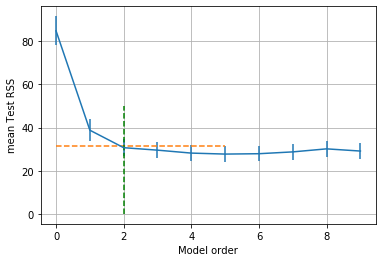

In [51]:
# TODO
# Find the minimum RSS target
imin = np.argmin(RSS_mean)
RSS_tgt = RSS_mean[imin] + RSS_se[imin]

# Find the lowest model order below the target
I = np.where(RSS_mean <= RSS_tgt)[0]
iopt = I[0]
dopt = dtest[iopt]

plt.errorbar(dtest, RSS_mean, yerr=RSS_se, fmt='-')

# Plot the line at the RSS target
plt.plot([dtest[0],dtest[imin]], [RSS_tgt, RSS_tgt], '--')

# Plot the line at the optimal model order
plt.plot([dopt,dopt], [0,50], 'g--')


plt.xlabel('Model order')
plt.ylabel('mean Test RSS')
plt.grid()

# Print results
print("The estimated model order is %d" % dopt)

Finally, make a scatter plot of the data and superimpose
* the polynomial prediction curve with the order that minimizes mean RSS
* the polynomial prediction curve with the order selected by the one-standard-error rule

As usual, add grid lines, axis labels, and a legend to your curve

In [ ]:
# fit the model
# compute the polynomial prediction curve 
# make scatterplot and superimpose curves
# add legend, axis labels, grid

Text(0, 0.5, 'Median value of owner-occupied homes in $1000s')

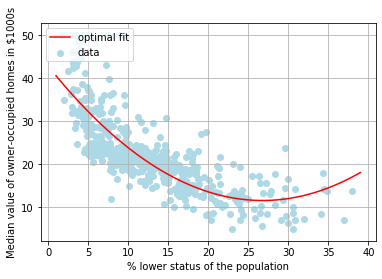

In [54]:
# TODO 
# Import polynomial library
import numpy.polynomial.polynomial as poly
# beta1 = 
beta = poly.polyfit(x,y,dopt)
# xp = # grid of feature values
xp = np.linspace(1, 39, 1000)
# yp_hat1 = # target prediction on grid using polynomial order d1
yp_hat = poly.polyval(xp, beta)
# Make a scatterplot and superimpose prediction curves for d1 and d2
plt.plot(xp,yp_hat, color = 'red')
plt.scatter(x, y, color = 'lightblue')
# Add grid lines, axis labels, and a legend
plt.legend(['optimal fit', 'data'], loc='upper left')
plt.grid()
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')